In [ ]:
#análise de aminoácidos 


In [11]:
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
aa_types = {
    'A': 'apolar',  'V': 'apolar',  'L': 'apolar',  'I': 'apolar',  'P': 'apolar',
    'F': 'apolar',  'M': 'apolar',  'W': 'apolar',  'G': 'apolar',

    'S': 'polar',   'T': 'polar',   'C': 'polar',   'Y': 'polar',   'N': 'polar',   'Q': 'polar',

    'D': 'ácido',   'E': 'ácido',

    'K': 'básico',  'R': 'básico',  'H': 'básico'
}

In [13]:
def adjust_charge(aa, ph):
    
    if aa == 'D' or aa == 'E':
        
        if ph < 4.0:
            return 'ácido protonado'  # -COOH (não ionizado)
        else:
            return 'ácido'  # -COO⁻ (ionizado)

    
    if aa == 'K' or aa == 'R':
        
        if ph < 9.0:
            return 'básico protonado'  # -NH₃⁺ (protonado)
        else:
            return 'básico'  # -NH₂ (desprotonado)

    if aa == 'H':
        
        if ph < 6.0:
            return 'básico protonado'
        else:
            return 'básico'

    
    return aa_types.get(aa, 'desconhecido')

In [14]:
seq = "MGCRDVHAATVLSFLCGIASVAGLFAGTLLPNWRKLRLITFNRNEKNLTVYTGLWVKCARYDGSSDCLMYDTTWYSSVDQLDLRVLQFALPLSMLIAMGALLLCLIGMCNTAFRSSVPNIKLAKCLVNSAGCHLVAGLLFFLAGTVSLSPSIWVIFYNIHLNKKFEPVFSFDYAVYVTIASAGGLFMTSLILFIWYCTCKSLPSPFWQPLYSHPPSMHTYSQPYSARSRLSAIEIDIPVVSHTT"

In [15]:
ph = 7.4  # Modifique o pH conforme necessário

In [16]:
seq = seq.upper()
filtered_seq = [aa for aa in seq if aa in aa_types]

In [17]:
adjusted_seq = [adjust_charge(aa, ph) for aa in filtered_seq]

In [18]:
type_counts = Counter([aa_types[aa] for aa in filtered_seq])

In [21]:
print("Frequência de tipos de aminoácidos na sequência (ajustada para pH {}):".format(ph))
for tipo, count in type_counts.items():
    print(f"{tipo.capitalize()}: {count} ({(count/len(filtered_seq))*100:.1f}%)")

Frequência de tipos de aminoácidos na sequência (ajustada para pH 7.4):
Apolar: 136 (55.7%)
Polar: 74 (30.3%)
Básico: 23 (9.4%)
Ácido: 11 (4.5%)


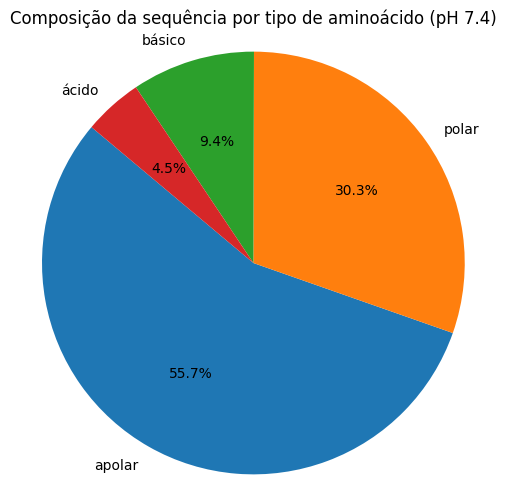

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title(f"Composição da sequência por tipo de aminoácido (pH {ph})")
plt.axis('equal')
plt.show()